In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X, y = load_digits(return_X_y = True)

In [ ]:
X.shape

(1797, 64)

In [ ]:
import matplotlib.pyplot as plt

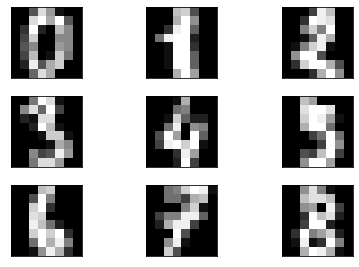

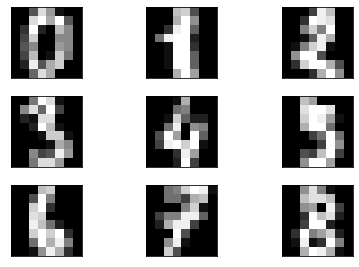

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X[i].reshape(8,8),cmap= "gray" , interpolation = 'none')
  plt.yticks([])
  plt.xticks([])
fig


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MinMaxScaler(copy = False).fit_transform(X)

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [ ]:
import numpy as np

In [ ]:
np.max(X)

1.0

In [ ]:
X = X.reshape(X.shape[0],8,8,1).astype('float32')

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y = to_categorical(y)

In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras import models

In [ ]:
model_1 = models.Sequential()

In [ ]:
from tensorflow.keras import layers

In [ ]:
model_1.add(layers.InputLayer(input_shape = (8,8,1), name = "inputek"))

In [ ]:
model_1.add(layers.Conv2D(32,(3,3), activation ='relu', name =  'convolutionalowa'))

In [ ]:
model_1.add(layers.MaxPooling2D((2,2), name = "max_pooling"))

In [ ]:
model_1.add(layers.Flatten(name="flatten"))

In [ ]:
model_1.add(layers.Dense(100, activation = 'relu', name = 'hiden'))

In [ ]:
model_1.add(layers.Dense(10, activation = 'relu', name = 'output'))

In [ ]:
model_1.compile(optimizer = 'rmsprop', 
                loss = 'categorical_crossentropy',  
                metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolutionalowa (Conv2D)   (None, 6, 6, 32)          320       
                                                                 
 max_pooling (MaxPooling2D)  (None, 3, 3, 32)          0         
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 hiden (Dense)               (None, 100)               28900     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 30,230
Trainable params: 30,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

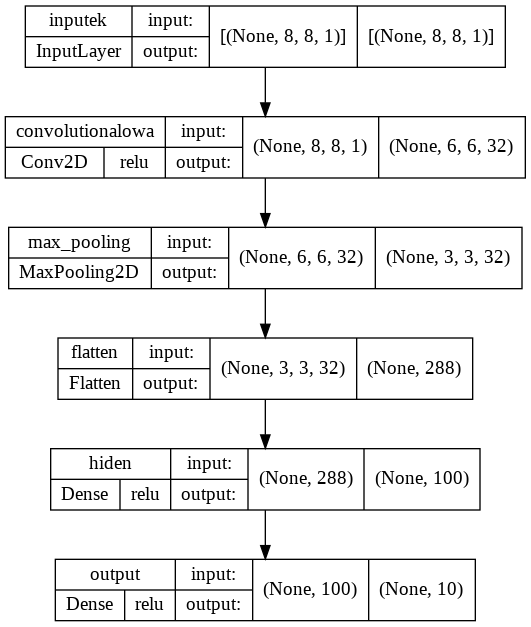

In [ ]:
plot_model(model_1, show_shapes = True , show_layer_activations= True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                     test_size = 0.25,
                                                     stratify = y,
                                                     random_state = 42)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
val_stop = EarlyStopping(monitor = 'val_loss', patience = 5 )

In [ ]:
X_train.shape

(1347, 8, 8, 1)

In [ ]:
y_train.shape

(1347, 10)

In [ ]:
X_test.shape

(450, 8, 8, 1)

In [ ]:
 y_test.shape

(450, 10)

In [ ]:
fit_1 = model_1.fit(X_train, y_train,
                    epochs = 150,
                    # batch_size = 32
                    callbacks = [val_stop],
                    validation_data = [X_test, y_test])

Epoch 1/150
43/43 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/150
43/43 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/150
43/43 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/150
43/43 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/150
43/43 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1000


In [ ]:
y_pred_1 = fit_1.model.predict(X_test)

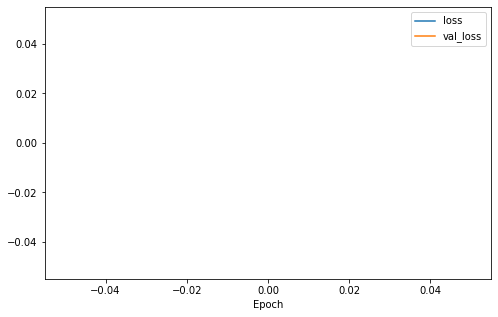

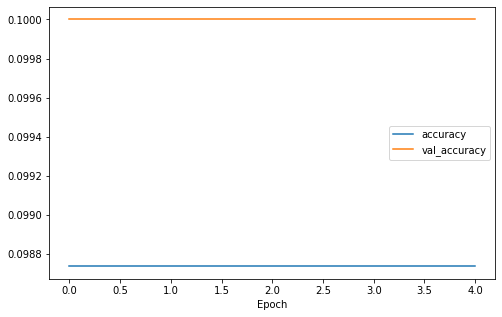

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fit_1.history['loss'], '-', label='loss')
plt.plot(fit_1.history['val_loss'], '-', label='val_loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(fit_1.history['accuracy'], '-', label='accuracy')
plt.plot(fit_1.history['val_accuracy'], '-', label='val_accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()